<a href="https://colab.research.google.com/github/Swara-24/Explainable-AI/blob/main/Colab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.datasets import load_boston
from sklearn import datasets

In [ ]:
data=datasets.load_boston()
datafr=pd.DataFrame(data['data'])
datafr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X=data.data
y=data.target
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## LINEAR REGRESSION

In [ ]:
model1=LinearRegression()

In [ ]:
model1.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
val_predictions1 = model1.predict(val_X)
val_predictions1

array([32.37816533, 27.95684437, 18.07213891, 21.63166556, 18.93029508,
       19.96277202, 32.2834674 , 18.06715668, 24.72989076, 26.85359369,
       27.23326816, 28.57021239, 21.18778302, 26.94393815, 23.37892579,
       20.89176865, 17.11746934, 37.73997945, 30.51980066,  8.44489436,
       20.86557977, 16.21989418, 25.13605925, 24.77658813, 31.40497629,
       11.02741407, 13.82097563, 16.80208261, 35.94637198, 14.7155729 ,
       21.23939821, 14.15079469, 42.72492585, 17.83887162, 21.84610225,
       20.40178099, 17.50287927, 27.00093206,  9.80760408, 20.00288662,
       24.27066782, 21.06719021, 29.47089776, 16.48482565, 19.38852695,
       14.54778282, 39.39838319, 18.09810655, 26.22164983, 20.60676525,
       25.09994066, 24.48366723, 25.02297948, 26.84986898,  5.01517985,
       24.12809513, 10.72843392, 26.83178157, 16.8023533 , 35.48142073,
       19.50937911, 27.43260347, 16.58016763, 19.151488  , 10.9990262 ,
       32.05016535, 36.32672849, 21.8596379 , 24.8158357 , 25.32

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print("Mean absolute error: ")
print(mean_absolute_error(val_y, val_predictions1))

Mean absolute error: 
3.574868126127545


In [ ]:
print("Coefficients") 
print(model1.coef_)
print("Intercept") 
print("%2f"%model1.intercept_)

Coefficients
[-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]
Intercept
45.192515


INTERPRETATION -
In linear regression,

The hypothesis function h(theta)=
theta_0 + theta_1 * x1 + theta_2 * x2 +...
where theta 1 , theta 2 are coefficients and x1,x2 are features.

Here, h = 45.192515 -1.14428903e-01 x1 + 5.71299780e-02 x2 +  3.83002824e-02  x3 + 2.42854641e+00 x4 -2.12326236e+01 x5 +  2.87723416e+00 x6 +  6.91118094e-03 x7 -1.47158266e+00 x8 +  3.05784197e-01 x9 -1.06750361e-02 x10 -9.96138270e-01 x11 + 6.27746234e-03 x12 -5.57414427e-01 x13

The above function will fit the data given (not perfectly since mean absolute error of 3.57 is involved).

## DECISION TREE

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
data_wine=datasets.load_wine()
X=data_wine.data
y=data_wine.target
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
# Specify Model
model2 = DecisionTreeClassifier(random_state=1)
# Fit Model
fit=model2.fit(train_X, train_y)

In [ ]:
val_predictions2 = model2.predict(val_X)

In [ ]:
print("Mean absolute error: ")
print(mean_absolute_error(val_y, val_predictions2))

Mean absolute error: 
0.044444444444444446


We have checked error to find the accuracy and it is found to be almost 0.

Text(0.5, 1.0, 'Decision Tree')

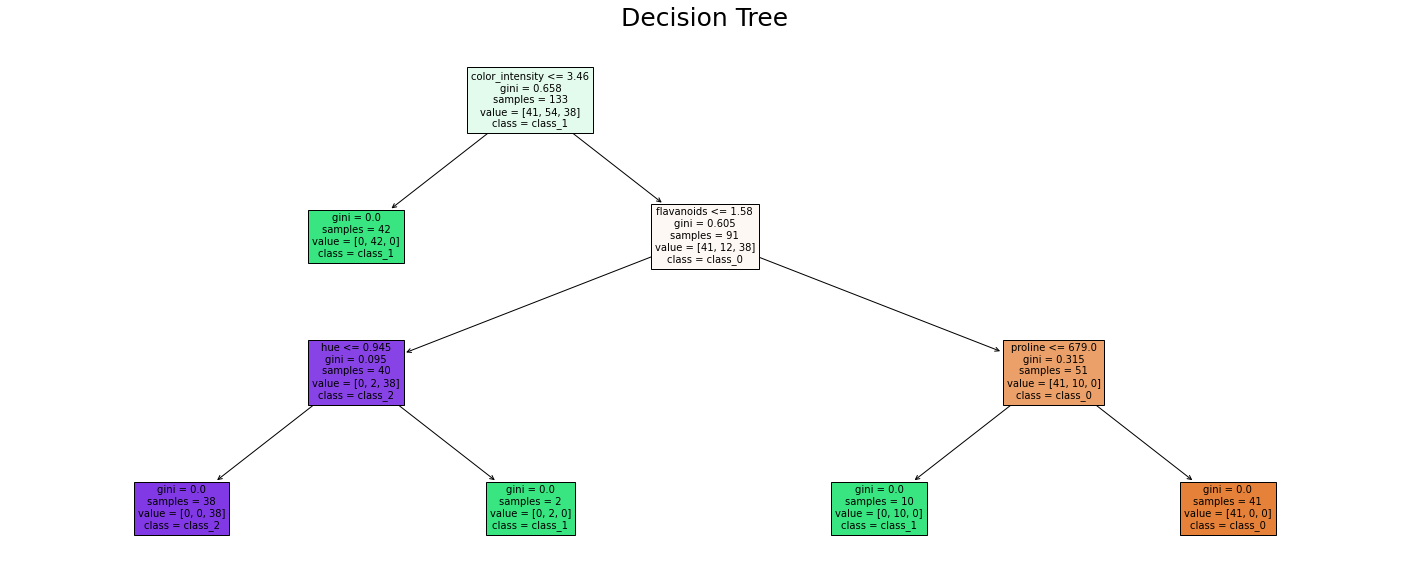

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(25, 10))
tree.plot_tree(fit,fontsize=10,filled=True,feature_names=data_wine.feature_names, class_names=data_wine.target_names)
plt.title("Decision Tree",size=25)

INTERPRETATION -

The colour codes are for 3 classes - 0,1,and 2.

The tree is divided by minimising the gini impurity everytime. Gini impurity is a measure of variables that are classified incorrectly. For example, at the root node, colour intensity<=3.46 given the minimum gini(0.658) among all the splits. Once it becomes 0,the group is perfectly homogeneous and there is no further classification(the leaf nodes).

When we need to predict the class, we will check the constraint on every node down the tree to the left and right child till we reach the gini impurity 0 ie leaf node.

## Neural Networks

We are using Keras in the sequential API to define a Neural network that will be train this data with an input dimension = no. of inputs in data .We will then have a layer of 16, then 8, then 6, and finally 1(last layer is a vector). The final layer will be activated by a sigmoid function(to get the probabilities of classification) which will push it towards a 1 or a 0. This Neural Network can then be used to predict future values. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
data_cancer=load_breast_cancer()
X=data_cancer.data
y=data_cancer.target
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

model = Sequential() 
model.add(Dense(16, activation ='relu', input_dim=30))
#Here, the input layer would expect a one-dimensional array with 30 elements for input. It would produce 16 outputs in return.
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


Here, we have to specify the optimizer and loss function. On each iteration, it measures how well it did in training using the loss function. It then tries to improve on that using the optimizer.

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [ ]:
#print(data_cancer.feature_names)

We fit the data using fit, passing it the training data -- i.e. for this set of X, this is what the Y should look like. The training itself takes a Fit function. Here in the training we pass x's and y's, and specify how many times it will loop, where a loop is it making a guess at the relationship between the x and the y.It measures how well or how bad it does using the loss function, and then it improves on its guess using the optimizer. 

The NN will then spot the patterns in the data, and build a neural network that could replicate that. 

In [ ]:
model.fit(train_X, train_y, batch_size = 1, epochs = 100)

Epoch 1/100
426/426 [==============================] - 1s 1ms/step - loss: 1.3079
Epoch 2/100
426/426 [==============================] - 0s 1ms/step - loss: 0.3301
Epoch 3/100
426/426 [==============================] - 0s 1ms/step - loss: 0.2975
Epoch 4/100
426/426 [==============================] - 0s 986us/step - loss: 0.2987
Epoch 5/100
426/426 [==============================] - 0s 1ms/step - loss: 0.2921
Epoch 6/100
426/426 [==============================] - 1s 1ms/step - loss: 0.2761
Epoch 7/100
426/426 [==============================] - 0s 1ms/step - loss: 0.2726
Epoch 8/100
426/426 [==============================] - 0s 995us/step - loss: 0.2908
Epoch 9/100
426/426 [==============================] - 0s 1ms/step - loss: 0.3125
Epoch 10/100
426/426 [==============================] - 0s 1ms/step - loss: 0.3144
Epoch 11/100
426/426 [==============================] - 0s 1ms/step - loss: 0.2929
Epoch 12/100
426/426 [==============================] - 0s 1ms/step - loss: 0.2843
Epoch 13/

To predict new values, the Neural Network uses predict. We are passing the test values for X (which the Neural Network hasn't previously seen) and it will give back a set of predictions.

In [ ]:
val_predictions3 = model.predict(val_X)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


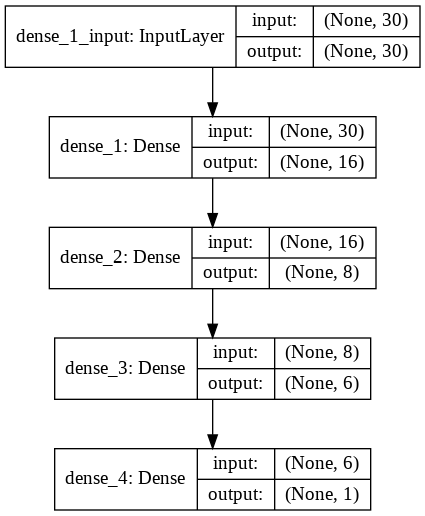

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True,show_layer_names=True)

INTERPRETATION -
1. First is the input layer with 30 inputs and 30 outputs.
2. Second layer has 30 inputs and 16 outputs.
3. Third has the 16 outputs of second layer as input and gives 8 outputs to layer 3.
4. Fourth layer gives 6 outputs to the last layer which has one final output.

We calculate the error to get an idea of accuracy

In [ ]:
mae=mean_absolute_error(val_y,val_predictions3)
print(mae)

0.14566911125224896


The error is very small(<1). This implies that we have successfully trained and correctly predicted.

## tSNE on text

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tsne = TSNE(n_components=2, random_state=0)
#fitting tSNE model to our data
#this is the same data we used above (bank note authentication)
data_tsne = tsne.fit_transform(data_cancer.data)
#converting into dataframe
df_tsne=pd.DataFrame(data=data_tsne,columns=['X','Y'])
df_tsne['label']=data_cancer.target

In [ ]:
len(data_cancer['feature_names'])

30

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'tSNE plot')

<Figure size 432x360 with 0 Axes>

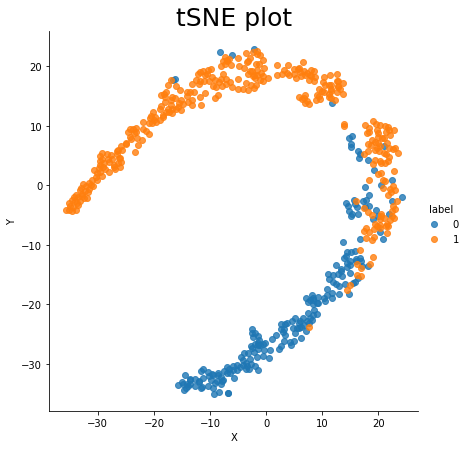

In [ ]:
plt.figure(figsize=(6, 5))
g = sns.lmplot(x='X',y='Y',data=df_tsne, fit_reg=False,hue='label', size=6)
plt.title("tSNE plot",size=25)

INTERPRETATION -
We have 2 labels 0 and 1 denoting benign and malignant breast cancer as 0 and 1 respectively.
The data had 30 dimensions which was converted to 2D by using tSNE. 

Now, the above plot uses these 2 dimensions of tSNE dataframe. The 2 categories are colour coded using target name of the data. Thus, It is observed that points from different categories are separate and records of same categories are clustered together(except a few outliers where they overlap).


## tSNE on image MNIST

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

Steps followed:
1. Loading data
2. Taking the first 1000 values for convenience(time consuming process)
3. Applying tSNE and fitting the model
4. Converting the fit into dataframe for plotting
5. Plotting the model

In [ ]:
df =load_digits()
red_df=df.data[:1000]


###Parameters of tsne
n_components - int, optional (default: 2)
Dimension of the embedded space.

random_state - int, RandomState instance, default=None
Determines the random number generator. Pass an int for reproducible results across multiple function calls. 

perplexity - float, optional (default: 30)
The perplexity is related to the number of nearest neighbors(expected density). 
Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. 
Different values can result in significanlty different results.

learning_rate - float, optional (default: 200.0)
The learning rate for t-SNE is usually in the range [10.0, 1000.0]. 
If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. 
If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. 

n_iter - int, optional (default: 1000)
Maximum number of iterations for the optimization. Should be at least 250.

In [ ]:
model1 = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)
model2 = TSNE(n_components=2, random_state=0, perplexity=50, learning_rate=200, n_iter=2000)
tsne1 = model1.fit_transform(red_df)
tsne2 = model2.fit_transform(red_df)
print(tsne1)
print(tsne2)
# fit_transform(self, X[, y])
# Fit X into an embedded space and return that transformed output.

[[ -0.4939472 -63.81038  ]
 [  0.8000618  20.015368 ]
 [ 12.861437   -2.2496257]
 ...
 [ -4.428643   -3.6826499]
 [ -9.084177   37.267696 ]
 [  2.0071123 -24.9061   ]]
[[-43.80608    12.122153 ]
 [  6.769919  -10.83782  ]
 [ 15.309129   -0.3130291]
 ...
 [  3.3388908  10.282953 ]
 [  4.3390474 -25.617235 ]
 [  6.9019423  27.151646 ]]


In [ ]:
df_tsne1 = pd.DataFrame(data=tsne1, columns=["X", "Y"])
df_tsne1['label']=df.target[:1000]
df_tsne1

,X,Y,label
0,-0.493947,-63.810379,0
1,0.800062,20.015368,1
2,12.861437,-2.249626,2
3,-0.509260,-25.503809,3
4,-5.970232,38.978191,4
...,...,...,...
995,-32.694592,18.546644,7
996,32.363453,28.823307,6
997,-4.428643,-3.682650,8
998,-9.084177,37.267696,4


In [ ]:
df_tsne2 = pd.DataFrame(data=tsne2, columns=["X", "Y"])
df_tsne2['label']=df.target[:1000]
df_tsne2

,X,Y,label
0,-43.806080,12.122153,0
1,6.769919,-10.837820,1
2,15.309129,-0.313029,2
3,5.538472,26.130787,3
4,1.435376,-25.093584,4
...,...,...,...
995,24.054022,-18.785721,7
996,-28.333189,-17.418228,6
997,3.338891,10.282953,8
998,4.339047,-25.617235,4


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'tSNE plot 1')

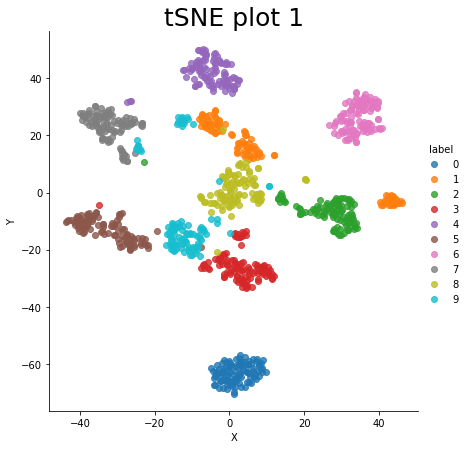

In [ ]:
g = sns.lmplot(x='X',y='Y',data=df_tsne1, fit_reg=False, hue='label',size=6)
plt.title("tSNE plot 1",size=25)

The various colours denote the various digits like 0,1,2,3,4...etc.
Points corresponding to same digit are clustered together.

We have applied model 2 below with increased perplexity and number of iterations to see if the accuracy is increased.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'tSNE plot 2')

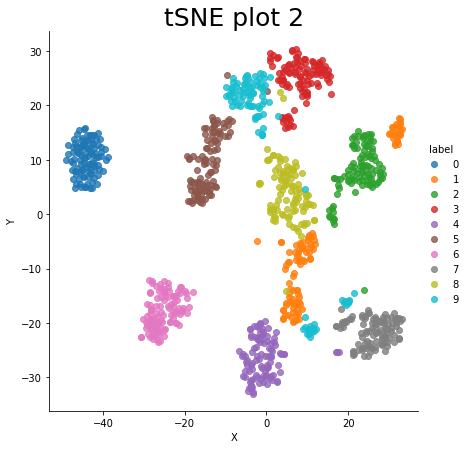

In [ ]:
g = sns.lmplot(x='X',y='Y',data=df_tsne2, fit_reg=False,hue='label', size=6)
plt.title("tSNE plot 2",size=25)

We observe that the images corresponding to the different digits are separated into different clusters of points.There is very little overlapping because of some similarity. For example, all the blue(dark) points and pink points that represent 0 and 6 respectilvely are very separate whereas there are some outliers of 9 and 1.

## ERROR METRICS

When evaluating a clustering algorithm we have 2 cases -
1. when we know the actual class variables, we can use homogeneity,completeness and v_measure score
2. If we don't know ground truth labels, we need to use silhouette score.

### SILHOUETTE SCORE
Returns the mean of all Silhouette coefficients.


Coefficient of a sample s= (b - a)/max(a,b) where,


a is the average distance between s and all the other data points in the cluster to which s belongs

b is the minimum average distance from s to all clusters to which it does not belong

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

CASE 1

In [ ]:
df=data_cancer.data

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

In [ ]:
#kmeans.labels_

In [ ]:
h=homogeneity_score(data_cancer.target, kmeans.labels_)
h

0.42229071246999117

In [ ]:
c=completeness_score(data_cancer.target, kmeans.labels_)
c

0.5168089972809706

In [ ]:
print(v_measure_score(data_cancer.target, kmeans.labels_) )
#harmonic mean of completeness and homogeneity
2/((1/h)+(1/c))

0.46479332792160793


0.46479332792160793

In [ ]:
silhouette_score(df, kmeans.labels_)

0.6972646156059464

The above scores indicate that there is moderate clustering since the higher the score the better is the performance.

CASE 2

The number of clusters is taken as 2 previously. In unsupervised learning, we don't know the number of classes for clustering. So,Using the Silhouette score for different no. of clusters we can check the appropriate k to be used.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


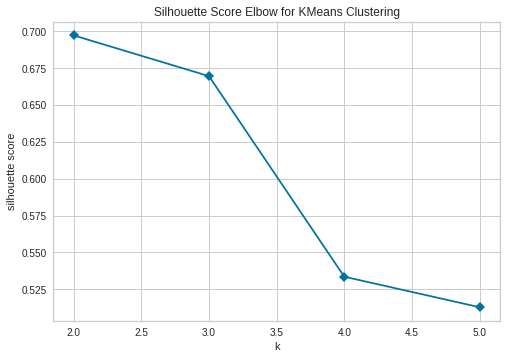

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)

# Call the KElbowVisualizer with the silhouette metric 
viz = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
viz.fit(df)
viz.poof() 

Clearly k should be 2 as it has the highest silhouette score.